## 우리만의 Custom dataset을 만들어보자

이글은 다음의 링크의 강의를 보고 작성한 글입니다.
https://www.edwith.org/deeplearningchoi/lecture/15553/ 

만약에 어떠한 폴더에 사진들이 겁나게 많다. 폴더별로 사진이 겁나 많다.
그러면 저렇게 데이터가 모여져 있을 때 어떻게 우리가 원하는 데이터셋으로 바꿀 수 있을 지 알아보자.


In [1]:
from skimage import io
from skimage import transform
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline
cwd = os.getcwd()
print("패키지를 로드하자")
print("CURRENT FOLDER IS [%s]" % (cwd))

패키지를 로드하자
CURRENT FOLDER IS [C:\Users\gunooknam\Desktop\machine_learning\Homework\Deep_learning_Study\etc]


In [2]:
# 이제는 데이터들이 있는 폴더들을 정의하자
paths = ["./data/cats",
         "./data/dogs"] # 상대 경로를 정의해주었다.

# 멍멍이와 개의 데이터셋 빡에 없음
categories = ['cat','dog']

# 내가 이미지를 얼마사이즈로 리사이즈 할지...?
imgSize = [64,64]
isGray = False
data_name = "myCustomData"

# 너의 이미지가 저 폴더에 있어야 한다.
print("WELECOM YOUR IMAGE SHOULD BE AT")
for i,path in enumerate(paths):
    print(" [%d/%d] %s" %(i, len(paths), path))

# 그리고 여기에 저장을 할 것이다.
print("Data Will Saved to \n [%s]"
      % (cwd + '/data/' + data_name + '.npz'))


WELECOM YOUR IMAGE SHOULD BE AT
 [0/2] ./data/cats
 [1/2] ./data/dogs
Data Will Saved to 
 [C:\Users\gunooknam\Desktop\machine_learning\Homework\Deep_learning_Study\etc/data/myCustomData.npz]


In [3]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3],[0.299,0.587,0.114])
    else:
        return rgb

# data 라는 폴더 아래에 cats, dogs라는 class가 있으므로 2가지가 나온다. 
즉 라벨링할 개수를 알아보는 작업 ↓

In [4]:
nclass = len(paths)
print(nclass)

2


# ONE_HOT ENCODING
1.np.eye 로 identity 행렬 생성

가로길이 = class 수, 세로길이 = class 수


[[ 1, 0, 0, 0, 0.... ,0]

 [ 0, 1, 0, 0, 0.... ,0]
 
     .....
 
 
 [ 0, 0, 0, 0, 0...1,0]
 
 [ 0, 0, 0, 0, 0...0,1]]

2.행렬을 한 줄씩 뽑는다. 이 때 Slicing 사용 

* 첫번째 카테고리 => [[ 1, 0, 0, 0, 0.... ,0]]

* 두번째 카테고리 => [[ 0, 1, 0, 0, 0.... ,0]]

* 세번째 카테고리 => [[ 0, 0, 1, 0, 0.... ,0]]






In [5]:
nclass = len(paths)
valid_exts = [".jpg",
              ".gif",
              ".png",
              ".jpeg"]

imgcnt = 0
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath #  경로를 가져온다.
    flist = os.listdir(path)
    for f in flist: # 파일 리스트에서 파일을 가져오고
        
        # 파일의 확장자가 내가 정해놓은 확장자가 있으면 넘어가고 없으면 위로 올라간다.
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
            
        #이미지를 불러오기위해서 fullpath를 가져온다.
        fullpath = os.path.join(path,f)
        
        currimg = io.imread(fullpath)
        
        # gray img로 바꾸자.
        if isGray:
            grayimg = rgb2gray(currimg)
        else :
            grayimg = currimg
            
        # 이미지를 RESIZE 해준다.   
        graysmall = imresize(grayimg, [imgSize[0],imgSize[1]] )/255.
        
        # 이것을 이제 한줄로 피고
        grayvec  =  np.reshape(graysmall, (1,-1))
        
        # 라벨을 구한다. => np.eye로 단위행렬을 만들고 i=0일떄 한 행가져오고
        # identity 행렬의 한행씩 가져온다.
        curr_label = np.eye(nclass, nclass)[i: i+1, :]
        
        # print(grayvec)
        # print(curr_label)
        
        if imgcnt is 0: # 처음이미지 일 때만 저장
            totalimg  =  grayvec
            totallabel = curr_label
            
        else : # 그렇지 않으면 np.concat으로 이미지 쌓는다. 
            totalimg   = np.concatenate((totalimg, grayvec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
            
        imgcnt  = imgcnt +1
        
print("Total %d IMAGES" % (imgcnt))

      
        

C:\Users\gunooknam\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Total 87 IMAGES


# 이러한 Dataset의 형태는 다음의 형태를 따른다.
MNIST data format과 동일하다. N => instance의 개수, d = dimension, C = Category 개수

<img src ="./모양.png" width="400px" height="400px" style="float:left"></img>

# slicing 과 그냥 원소하나 꺼내는 것의 차이 주의
슬라이싱을 하면 새로운 객체를 생성되게 된다. 즉, 하나의 값을 Slicing 하더라도 

이것은 객체형태로 생성이 되므로  (리스트안에 꺼내온 값이 담긴다.) 

하나의 값을 접근하는 방식과는 결과적으로 차이가 있다.

In [6]:
test_label = np.eye(4, 4)[0: 1, :] # 슬라이싱으로 값 하나 꺼내왔지만 객체형태로 생성되기 때문에 [  ]안에 담긴다.
print(test_label)
print(test_label.shape)

[[1. 0. 0. 0.]]
(1, 4)


In [7]:
test_label = np.eye(4, 4)[0, :] # 값 자체를 꺼내온 경우
print(test_label)
print(test_label.shape)

[1. 0. 0. 0.]
(4,)


# 이제는 Training Set과 Test Set으로 나눠보자

numpy.random.randint(low, high=None, size=None) 

=> size는 (2,5) 이런형태로 shape이 들어간다.

그러면 함수를 사용하여 랜덤으로 index를 셔플해보자 

In [8]:
def print_shape(string, x):
    print("SHAPE OF [%s] IS [%s]" %(string, x.shape))
    
randidx = np.random.randint(imgcnt, size=imgcnt) # 랜덤 인덱스 배열을 만든다.

trainidx = randidx[0:int(4 * imgcnt / 5)]
# random index 배열의 4/5 부분은 train set의 부분
testidx = randidx[int(4 * imgcnt / 5):imgcnt]
# random index 배열의 나머지 1/5 부분은 test set으로 설정

trainimg = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]

testimg =totalimg[testidx, : ]
testlabel = totallabel[trainidx, : ]

print_shape("totalimg", totalimg)
print_shape("totallabel", totallabel)

print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)

print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

SHAPE OF [totalimg] IS [(87, 12288)]
SHAPE OF [totallabel] IS [(87, 2)]
SHAPE OF [trainimg] IS [(69, 12288)]
SHAPE OF [trainlabel] IS [(69, 2)]
SHAPE OF [testimg] IS [(18, 12288)]
SHAPE OF [testlabel] IS [(69, 2)]


# 그러면 이것을 저장해보자
.npz 파일로 저장할 것이다. Key Value와 같은 형식으로 저장하는 것이라고 보면 된다. 

savez() 함수의 파라미터로 이름 = 넣을 객체이름 하나씩 넣어주자.

In [9]:
savepath = cwd + "/data/" + data_name + ".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel
        ,testimg=testimg, testlabel=testlabel
        ,imgSize=imgSize, isGray=isGray)
print("Saved to %s" % (savepath))

Saved to C:\Users\gunooknam\Desktop\machine_learning\Homework\Deep_learning_Study\etc/data/myCustomData.npz


# 저장한 것을 다시 열어보기
아까 넣은 것들을 확인해보자.

In [10]:
# 로드를 위한 path 설정
cwd = os.getcwd()
loadpath = cwd + "/data/" + data_name + ".npz"
lo = np.load(loadpath)

# 이 안에 뭐가 있는지 보자
print(lo.files)

['trainimg', 'trainlabel', 'testimg', 'testlabel', 'imgSize', 'isGray']


# 데이터 파싱하기
key값으로 우리가 넣은 value 값들을 꺼내올 수 있다.

In [11]:
# Parse data
trainimg_loaded = lo['trainimg']
trainlabel_loaded = lo['trainlabel']
testimg_loaded = lo['testimg']
testlabel_loaded = lo['testlabel']

print ("%d train images loaded" % (trainimg_loaded.shape[0]))
print ("%d test images loaded" % (testimg_loaded.shape[0]))
print ("Loaded from to %s" % (savepath))

69 train images loaded
18 test images loaded
Loaded from to C:\Users\gunooknam\Desktop\machine_learning\Homework\Deep_learning_Study\etc/data/myCustomData.npz


# 이제는 로드시켜서 그림을 그려보자
Label 배열 값에서 argmax를 해서 인덱스를 뽑아내고 그것을 categories의 인덱스로 값을 접근하면 카테고리의 이름이 뽑아진다.

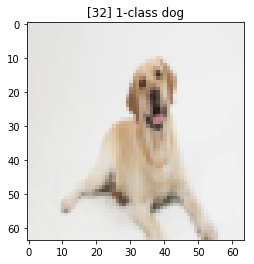

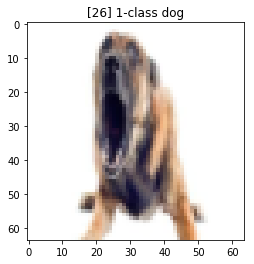

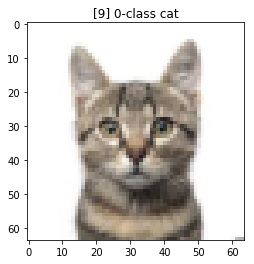

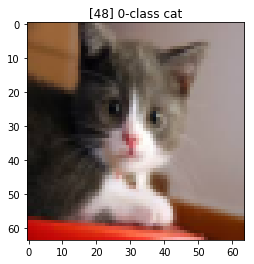

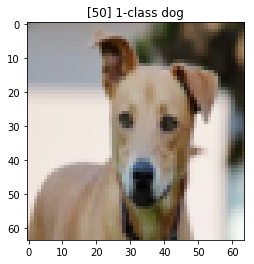

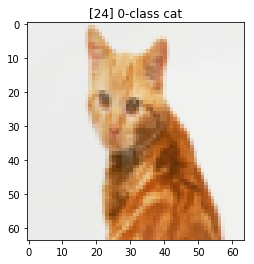

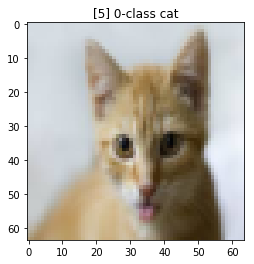

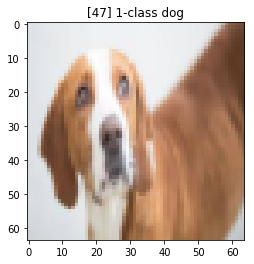

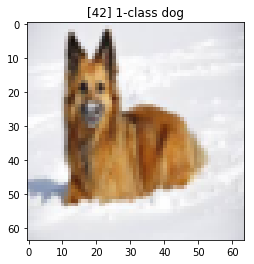

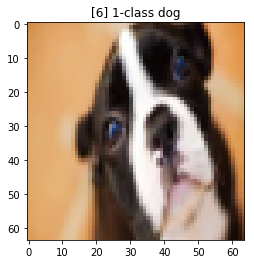

In [12]:
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 10
                            # 총 69개의 train set에서 Shuffle하고 
                            # batch_size만큼의 10개를 뽑느다.
randidx = np.random.randint(ntrain_loaded, size=batch_size)

# Shuffle 된 index 10개에서 loop가 돈다.
for i in randidx:
    currimg = np.reshape(trainimg_loaded[i, :],(imgSize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot)
    if isGray:
        currimg = np.reshape(trainimg[i, :], (imgSize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else :
        currimg = np.reshape(trainimg[i, :], (imgSize[0], imgSize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class %s" % (i, currlabel, categories[currlabel])
    plt.title(title_string) 
    plt.show()